In [1]:
import pandas as pd
import matplotlib.pyplot as plt

#2010年年1月1日から2020年1月1日のデータを格納した「kion10y.csv」を読み込む
df = pd.read_csv("kion10y.csv",encoding="utf-8")

#日付ごとの気温をリストにまとめる
md = {}

for i, row in df.iterrows():
    m,d,v = (int(row['月']),int(row['日']),float(row['気温']))
    key = str(m) + "/" + str(d)
    if not(key in md): md[key] = []
    md[key] += [v]
    
#日付ごとの平均気温を求める
avs = {}
for key in md:
    v = avs[key] = sum(md[key]) / len(md[key])
    print("{0} : {1}".format(key,v))
    


1/1 : 6.254545454545454
1/2 : 6.610000000000001
1/3 : 6.06
1/4 : 5.94
1/5 : 6.390000000000001
1/6 : 6.34
1/7 : 5.81
1/8 : 6.02
1/9 : 6.730000000000001
1/10 : 5.8
1/11 : 5.64
1/12 : 4.46
1/13 : 5.4
1/14 : 4.51
1/15 : 4.200000000000001
1/16 : 5.12
1/17 : 5.55
1/18 : 5.22
1/19 : 6.25
1/20 : 5.75
1/21 : 6.079999999999999
1/22 : 5.3100000000000005
1/23 : 5.5200000000000005
1/24 : 4.74
1/25 : 5.319999999999999
1/26 : 5.09
1/27 : 5.739999999999999
1/28 : 6.23
1/29 : 5.9
1/30 : 5.910000000000001
1/31 : 5.779999999999999
2/1 : 5.540000000000001
2/2 : 6.0600000000000005
2/3 : 6.670000000000002
2/4 : 6.94
2/5 : 5.8500000000000005
2/6 : 5.2299999999999995
2/7 : 6.08
2/8 : 4.8100000000000005
2/9 : 4.7299999999999995
2/10 : 5.61
2/11 : 4.74
2/12 : 4.930000000000001
2/13 : 5.91
2/14 : 6.18
2/15 : 6.0200000000000005
2/16 : 5.699999999999999
2/17 : 6.369999999999999
2/18 : 5.43
2/19 : 6.220000000000001
2/20 : 7.209999999999999
2/21 : 6.93
2/22 : 6.35
2/23 : 8.010000000000002
2/24 : 8.39
2/25 : 8.239999

In [2]:
#任意の日付
avs["8/3"]

28.390000000000004

月
1      5.668810
2      6.347518
3      9.939032
4     14.678333
5     19.822581
6     22.462667
7     26.703226
8     27.971290
9     24.254667
10    18.922258
11    13.311000
12     8.128387
Name: 気温, dtype: float64


C:\Users\2180020\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 26376 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\2180020\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:176: RuntimeWarning: Glyph 26376 missing from current font.
  font.load_char(ord(s), flags=flags)


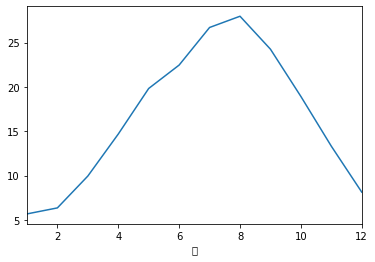

In [3]:
#月ごとの平均を求める
g = df.groupby(['月'])["気温"]
gg = g.sum() / g.count()

print(gg)
gg.plot()
plt.savefig("temki-heikin-tuki.png")
plt.show()

年
2010    21
2011     9
2012     8
2013    16
2014    12
2015     7
2016     1
2017     1
2018    11
2019     7
Name: 年, dtype: int64


C:\Users\2180020\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 24180 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\2180020\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:176: RuntimeWarning: Glyph 24180 missing from current font.
  font.load_char(ord(s), flags=flags)


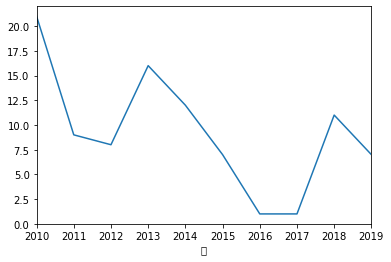

In [4]:
#気温が30度超えの年を抽出

atui_bool = (df["気温"] > 30)
atui = df[atui_bool]
cnt = atui.groupby(["年"])["年"].count()

print(cnt)
cnt.plot()
plt.savefig("tenki-over30.png")
plt.show()

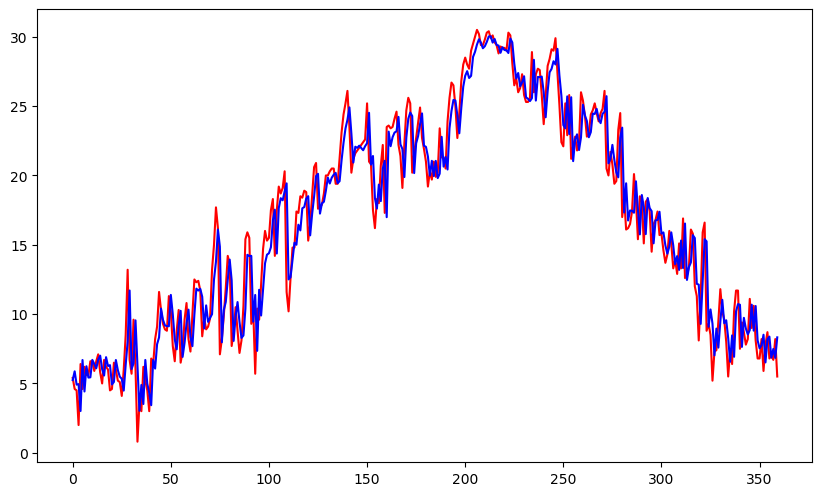

In [5]:
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#10年分のデータの読み込み
df = pd.read_csv('kion10y.csv',encoding="utf-8")

#データを学習用とテスト用に分ける
train_year = (df["年"] <= 20018)
test_year = (df["年"] >= 2019)
interval = 6

#過去6日分を学習するデータを作成
def make_data(data):
    x = []#学習データを格納
    y = []#結果
    temps = list(data["気温"])
    for i in range(len(temps)):
        if i < interval: continue
        y.append(temps[i])
        xa = []
        for p in range(interval):
            d = i + p - interval
            xa.append(temps[d])
        x.append(xa)
    return (x,y)

train_x, train_y = make_data(df[train_year])
test_x,test_y = make_data(df[test_year])

#直線回帰分析を行う
lr = LinearRegression(normalize=True)
lr.fit(train_x,train_y) #学習する
pre_y = lr.predict(test_x) #予測する

#結果を出力
plt.figure(figsize=(10,6),dpi=100)
plt.plot(test_y,c='r')
plt.plot(pre_y,c='b')
plt.savefig('tenki-kion-lr.png')
plt.show()

In [6]:
#分析データの誤差を調べる

diff_y = abs(pre_y - test_y)

print("平均誤差　:　",sum(diff_y / len(diff_y)))
print("最大誤差　:　",max(diff_y))

平均誤差　:　 1.5253952089289728
最大誤差　:　 7.82817393981288
